In [62]:
# every hour 2019-04-20 to 2025-05-14

In [278]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [279]:
spot_parquet_dir = os.path.join('binance', 'spot-1h-0509')
futures_parquet_dir = os.path.join('binance', 'futures-1h-0603')

In [280]:
def describe_file(df):
    df=df.reset_index()
    print(df.index)
    print(df.head())
    print(df.columns)
    print(f"printing unique symbols:{df['base'].unique()}")
    
    

In [35]:

st=set()
files=[f for f in os.listdir(spot_parquet_dir) if f.endswith('parquet')]
for filename in tqdm(files, desc='processing parquet files'):
    # print(filename)
    df=pd.read_parquet(os.path.join(spot_parquet_dir,filename))
    # describe_file(df)
    df=df.reset_index()
    if 'base' in df.columns:
        
        st.update(df['base'].unique())
    else:
        print(f"base doesn't exist in {filename}")
print(st)

processing parquet files: 100%|████████████████████████████████| 2210/2210 [00:21<00:00, 104.36it/s]

{'BLZ', 'BTS', 'XNO', 'DREP', 'AST', 'EPX', 'FORM', 'LAYER', 'GHST', 'ARPA', 'SCR', 'OM', 'ZRX', 'LIT', 'CAKE', 'NEXO', 'BSW', 'BIFI', 'ZK', 'ARK', 'BICO', 'XRP', 'PARTI', 'ZRO', 'OSMO', 'GBP', 'LINA', 'LTO', 'CELR', 'JUP', 'RONIN', 'MANA', '1000CHEEMS', 'HIFI', 'DOCK', 'ANIME', 'CVP', 'BIO', 'KAITO', 'JST', 'CKB', 'GTO', 'GLM', 'STG', 'VET', 'ONE', 'BOND', 'WAVES', 'DUSK', 'FTT', 'WBETH', 'RSR', 'LTC', 'SUPER', 'GLMR', 'ACA', 'QI', 'FRONT', 'RENDER', 'COW', 'ALICE', 'KEY', 'PAXG', 'UFT', 'DOGE', 'ROSE', 'STMX', 'STRAX', 'VTHO', 'RNDR', 'LSK', 'ADX', 'APE', 'NBS', 'NEIRO', 'EUR', 'WNXM', 'REI', 'BMT', 'PENDLE', 'FDUSD', 'FORTH', 'KNC', 'BADGER', 'XLM', 'HARD', 'VIDT', 'AEVO', 'NEBL', 'RUNE', 'BEL', 'ANC', 'ANT', 'DCR', 'EPIC', 'API3', 'IO', 'BNSOL', 'CTK', 'GUN', 'DIA', 'FET', 'JTO', 'BOME', 'PIVX', 'PORTO', 'DEXE', 'LUNA', 'FUN', 'EPS', 'ASTR', 'TST', 'ZEC', 'OP', 'EIGEN', 'BONK', 'TFUEL', 'SANTOS', 'METIS', 'NEO', 'BAKE', 'AKRO', 'WCT', 'EOS', 'ETH', 'D', 'FARM', 'TLM', 'ATM', 'PUNDI

In [36]:
len(st)

487

In [38]:
from collections import Counter

base_counter = Counter()

files = [f for f in os.listdir(spot_parquet_dir) if f.endswith('parquet')]
df_list=[]
for filename in tqdm(files, desc='Processing parquet files'):
    df = pd.read_parquet(os.path.join(spot_parquet_dir, filename))
    df = df.reset_index()
    
    if 'base' in df.columns:
        base_counter.update(df['base'])
        df=df[df['base']=='BTC']
        df_list.append(df)
    else:
        print(f"'base' doesn't exist in {filename}")

# Print frequency map
print(base_counter)

Processing parquet files: 100%|████████████████████████████████| 2210/2210 [00:15<00:00, 140.34it/s]

Counter({'BNB': 52983, 'BTC': 52983, 'ETH': 52983, 'TRX': 52983, 'XRP': 52983, 'EOS': 50882, 'LINK': 50882, 'ADA': 50690, 'ONT': 50690, 'ETC': 50354, 'LTC': 50354, 'XLM': 50026, 'NEO': 49858, 'ATOM': 49402, 'DASH': 49378, 'ZEC': 49378, 'BAT': 48562, 'IOST': 48394, 'VET': 48394, 'QTUM': 48346, 'IOTA': 48012, 'XTZ': 47726, 'BCH': 47668, 'RVN': 47558, 'USDC': 46359, 'MATIC': 43477, 'ONG': 41972, 'HIVE': 41856, 'NULS': 41780, 'LSK': 41521, 'SOL': 41354, 'ANKR': 41306, 'CELR': 41306, 'HBAR': 41306, 'IOTX': 41306, 'ONE': 41306, 'ZIL': 41306, 'TFUEL': 41305, 'ARPA': 41186, 'CHZ': 41186, 'COTI': 41186, 'JST': 41186, 'CTSI': 41185, 'KMD': 41179, 'BNT': 41138, 'COMP': 41138, 'DOT': 41138, 'KAVA': 41138, 'KNC': 41138, 'LRC': 41138, 'MKR': 41138, 'SC': 41138, 'SNX': 41138, 'SXP': 41114, 'CRV': 41018, 'YFI': 41018, 'ALGO': 40970, 'BAND': 40970, 'DOGE': 40970, 'RLC': 40970, 'SUSHI': 40970, 'THETA': 40970, 'TRB': 40970, 'ZRX': 40970, 'SAND': 40946, 'WAN': 40946, 'RUNE': 40940, 'KSM': 40802, 'RSR': 40

In [39]:
df_combined = pd.concat(df_list)
df_combined.head()

,close_time,base,bam_vwa,bam_open,bam_close,bam_high,bam_low,bam_volatility_1m_return,base_volume,pct_buy_volume,annual_interest_rate,spread_1m_vwa_vwa,spread_twa
1,2019-04-20 01:00:00,BTC,5264.078218,5257.370,5255.150,5273.850,5254.525,3.576469,422.210461,49.667343,0.36524,0.677842,0.947055
6,2019-04-20 02:00:00,BTC,5266.318238,5254.935,5275.525,5285.250,5251.000,5.922756,550.562812,58.754393,0.36524,0.130476,0.845644
11,2019-04-20 03:00:00,BTC,5279.507125,5275.665,5273.365,5294.320,5266.070,5.695222,998.755749,59.920083,0.36524,0.225569,1.046440
16,2019-04-20 04:00:00,BTC,5271.180558,5273.360,5276.775,5278.965,5261.840,4.039062,536.708433,48.206048,0.36524,0.538942,0.931184
21,2019-04-20 05:00:00,BTC,5282.801431,5276.770,5296.015,5297.630,5268.795,7.376661,638.584431,47.474698,0.36524,0.479266,0.919920


In [40]:
df_combined.to_csv('BTC_spot_full.csv')

In [41]:
df_combined.columns

Index(['close_time', 'base', 'bam_vwa', 'bam_open', 'bam_close', 'bam_high',
       'bam_low', 'bam_volatility_1m_return', 'base_volume', 'pct_buy_volume',
       'annual_interest_rate', 'spread_1m_vwa_vwa', 'spread_twa'],
      dtype='object')

In [51]:
import plotly.graph_objects as go
import pandas as pd

def plot_candlestick_range(df, start_time, end_time, symbol='BTC'):
    if not pd.api.types.is_datetime64_any_dtype(df['close_time']):
        df['close_time'] = pd.to_datetime(df['close_time'])

    mask = (
        (df['close_time'] >= pd.to_datetime(start_time)) &
        (df['close_time'] <= pd.to_datetime(end_time)) &
        (df['base'] == symbol)
    )
    filtered = df[mask].sort_values('close_time')

    if filtered.empty:
        print(f"No data found for {symbol} between {start_time} and {end_time}")
        return

    fig = go.Figure(data=[go.Candlestick(
        x=filtered['close_time'],
        open=filtered['bam_open'],
        high=filtered['bam_high'],
        low=filtered['bam_low'],
        close=filtered['bam_close'],
        name=symbol
    )])

    fig.update_layout(
        title=f'{symbol} Candlestick from {start_time} to {end_time}',
        xaxis_title='Time',
        yaxis_title='Price',
        xaxis_rangeslider_visible=False
    )
    
    fig.show()



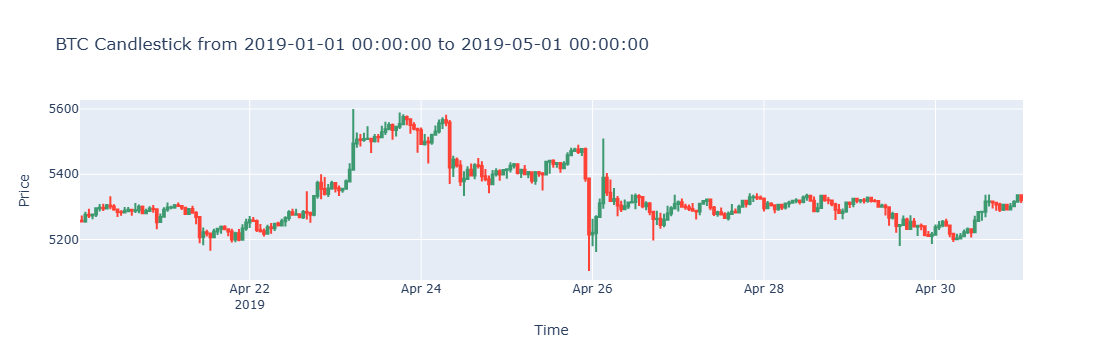

In [52]:
plot_candlestick_range(df_combined,'2019-01-01 00:00:00', '2019-05-01 00:00:00')

In [77]:

def test_indicator(indicator_fn, df, start_time, end_time, window_hours=3, symbol='BTC', want_return=False):
    df = df.copy()
    df['close_time'] = pd.to_datetime(df['close_time'])
    df = df[df['base'] == symbol].sort_values('close_time').reset_index(drop=True)

    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    df = df[(df['close_time'] >= start_time) & (df['close_time'] <= end_time)]

    entry_idx = np.arange(0, len(df) - window_hours, window_hours)
    
    signal = indicator_fn(df.iloc[entry_idx])  # only evaluate indicator every X hours
    price_now = df['bam_close'].values[entry_idx]
    price_future = df['bam_close'].values[entry_idx + window_hours]

    valid_mask = ~pd.isna(signal)
    signal = signal[valid_mask]
    price_now = price_now[valid_mask]
    price_future = price_future[valid_mask]

    returns = price_future - price_now

    wins_long = np.sum((signal == 1) & (returns > 0))
    wins_short = np.sum((signal == -1) & (returns < 0))
    total_long = np.sum(signal == 1)
    total_short = np.sum(signal == -1)
    total = total_long + total_short
    wins = wins_long + wins_short

    if total == 0:
        print("No trades made in the given period.")
    else:
        win_pct = 100 * wins / total
        print(f"Win % for {symbol} from {start_time} to {end_time}: {win_pct:.2f}% ({wins}/{total})")
        print(f"   Long wins: {wins_long}/{total_long}, Short wins: {wins_short}/{total_short}")

    if want_return== True:
       return {
        'win_pct': win_pct if total > 0 else None,
        'total_trades': total,
        'long_wins': wins_long,
        'short_wins': wins_short,
        'long_total': total_long,
        'short_total': total_short,
    }


In [55]:
#simple mean reversion
def vwa_mean_reversion(df, threshold=0.002):
    rel_diff = (df['bam_close'] - df['bam_vwa']) / df['bam_vwa']
    signal = np.where(rel_diff < -threshold, 1,
             np.where(rel_diff > threshold, -1, 0))
    return signal


In [56]:
#volatility breakout strategty
def volatility_breakout(df, high_thresh=0.01, low_thresh=0.002):
    vol = df['bam_volatility_1m_return'].values
    signal = np.where(vol > high_thresh, 1,
             np.where(vol < low_thresh, -1, 0))
    return signal




In [57]:
#buy volume sentiment indicator
def buy_volume_sentiment(df, high=0.6, low=0.4):
    pct = df['pct_buy_volume'].values
    signal = np.where(pct > high, 1,
             np.where(pct < low, -1, 0))
    return signal


In [58]:
def interest_rate_carry(df, high_thresh=0.10, low_thresh=0.02):
    r = df['annual_interest_rate'].values
    signal = np.where(r < low_thresh, 1,
             np.where(r > high_thresh, -1, 0))
    return signal


In [59]:
def spread_vwap_signal(df, threshold=0.001):
    s = df['spread_1m_vwa_vwa'].values
    signal = np.where(s < -threshold, 1,
             np.where(s > threshold, -1, 0))
    return signal


In [60]:
def wick_reversal_signal(df, wick_ratio=2.0):
    high = df['bam_high'].values
    low = df['bam_low'].values
    open_ = df['bam_open'].values
    close = df['bam_close'].values

    upper_wick = high - np.maximum(open_, close)
    lower_wick = np.minimum(open_, close) - low
    body = np.abs(close - open_)

    signal = np.where((lower_wick > wick_ratio * body), 1,
             np.where((upper_wick > wick_ratio * body), -1, 0))
    return signal


In [78]:
for time_step in range(1,25):
    print(f"Trading every {time_step} hours.")
    test_indicator(
        indicator_fn=buy_volume_sentiment,
        df=df_combined,
        start_time='2019-04-20 00:00:00',
        end_time='2023-01-01 00:00:00',
        window_hours=time_step,
        symbol='BTC'
    )


Trading every 1 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 50.72% (16429/32392)
   Long wins: 16429/32392, Short wins: 0/0
Trading every 2 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 50.92% (8247/16196)
   Long wins: 8247/16196, Short wins: 0/0
Trading every 3 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 51.06% (5513/10797)
   Long wins: 5513/10797, Short wins: 0/0
Trading every 4 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 51.05% (4134/8098)
   Long wins: 4134/8098, Short wins: 0/0
Trading every 5 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 51.79% (3355/6478)
   Long wins: 3355/6478, Short wins: 0/0
Trading every 6 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 51.52% (2781/5398)
   Long wins: 2781/5398, Short wins: 0/0
Trading every 7 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 51.50% (2383/4627)
   Long win

In [80]:
for time_step in range(1,25):
    print(f"Trading every {time_step} hours.")
    test_indicator(
        indicator_fn=vwa_mean_reversion,
        df=df_combined,
        start_time='2019-04-20 00:00:00',
        end_time='2023-01-01 00:00:00',
        window_hours=time_step,
        symbol='BTC'
    )

Trading every 1 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 55.58% (7374/13267)
   Long wins: 3573/6263, Short wins: 3801/7004
Trading every 2 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 55.61% (3664/6589)
   Long wins: 1770/3059, Short wins: 1894/3530
Trading every 3 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 53.62% (2386/4450)
   Long wins: 1172/2111, Short wins: 1214/2339
Trading every 4 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 54.41% (1778/3268)
   Long wins: 832/1489, Short wins: 946/1779
Trading every 5 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 53.48% (1398/2614)
   Long wins: 720/1254, Short wins: 678/1360
Trading every 6 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 52.66% (1196/2271)
   Long wins: 574/1059, Short wins: 622/1212
Trading every 7 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 51.60% 

In [81]:
for time_step in range(1,25):
    print(f"Trading every {time_step} hours.")
    test_indicator(
        indicator_fn=volatility_breakout,
        df=df_combined,
        start_time='2019-04-20 00:00:00',
        end_time='2023-01-01 00:00:00',
        window_hours=time_step,
        symbol='BTC'
    )

Trading every 1 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 50.72% (16427/32390)
   Long wins: 16427/32390, Short wins: 0/0
Trading every 2 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 50.92% (8246/16194)
   Long wins: 8246/16194, Short wins: 0/0
Trading every 3 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 51.07% (5513/10796)
   Long wins: 5513/10796, Short wins: 0/0
Trading every 4 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 51.05% (4134/8098)
   Long wins: 4134/8098, Short wins: 0/0
Trading every 5 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 51.79% (3355/6478)
   Long wins: 3355/6478, Short wins: 0/0
Trading every 6 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 51.51% (2780/5397)
   Long wins: 2780/5397, Short wins: 0/0
Trading every 7 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 51.49% (2382/4626)
   Long win

In [68]:
df_combined['bam_volatility_1m_return'].describe()


count    52981.000000
mean        73.772164
std         91.880736
min          0.775608
25%         17.702680
50%         44.492056
75%         94.906074
max       2290.834331
Name: bam_volatility_1m_return, dtype: float64

In [82]:
for time_step in range(1,25):
    print(f"Trading every {time_step} hours.")
    test_indicator(
        indicator_fn=spread_vwap_signal,
        df=df_combined,
        start_time='2019-04-20 00:00:00',
        end_time='2023-01-01 00:00:00',
        window_hours=time_step,
        symbol='BTC'
    )

Trading every 1 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 49.26% (15944/32370)
   Long wins: 6615/13239, Short wins: 9329/19131
Trading every 2 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 48.84% (7906/16186)
   Long wins: 3310/6658, Short wins: 4596/9528
Trading every 3 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 49.68% (5362/10793)
   Long wins: 2256/4433, Short wins: 3106/6360
Trading every 4 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 49.28% (3988/8092)
   Long wins: 1653/3278, Short wins: 2335/4814
Trading every 5 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 49.54% (3206/6471)
   Long wins: 1374/2661, Short wins: 1832/3810
Trading every 6 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 49.12% (2651/5397)
   Long wins: 1148/2261, Short wins: 1503/3136
Trading every 7 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:

In [83]:
for time_step in range(1,25):
    print(f"Trading every {time_step} hours.")
    test_indicator(
        indicator_fn=interest_rate_carry,
        df=df_combined,
        start_time='2019-04-20 00:00:00',
        end_time='2023-01-01 00:00:00',
        window_hours=time_step,
        symbol='BTC'
    )

Trading every 1 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 48.74% (6884/14123)
   Long wins: 870/1692, Short wins: 6014/12431
Trading every 2 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 48.00% (3390/7063)
   Long wins: 438/847, Short wins: 2952/6216
Trading every 3 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 48.33% (2275/4707)
   Long wins: 298/563, Short wins: 1977/4144
Trading every 4 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 47.03% (1661/3532)
   Long wins: 214/424, Short wins: 1447/3108
Trading every 5 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 46.96% (1327/2826)
   Long wins: 173/339, Short wins: 1154/2487
Trading every 6 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 47.62% (1121/2354)
   Long wins: 154/281, Short wins: 967/2073
Trading every 7 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 46.41% (936/

In [84]:
for time_step in range(1,25):
    print(f"Trading every {time_step} hours.")
    test_indicator(
        indicator_fn=wick_reversal_signal,
        df=df_combined,
        start_time='2019-04-20 00:00:00',
        end_time='2023-01-01 00:00:00',
        window_hours=time_step,
        symbol='BTC'
    )

Trading every 1 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 47.97% (4941/10301)
   Long wins: 3811/7831, Short wins: 1130/2470
Trading every 2 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 47.61% (2437/5119)
   Long wins: 1897/3894, Short wins: 540/1225
Trading every 3 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 48.40% (1680/3471)
   Long wins: 1315/2659, Short wins: 365/812
Trading every 4 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 48.30% (1236/2559)
   Long wins: 956/1964, Short wins: 280/595
Trading every 5 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 48.01% (1013/2110)
   Long wins: 789/1637, Short wins: 224/473
Trading every 6 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 50.86% (861/1693)
   Long wins: 647/1288, Short wins: 214/405
Trading every 7 hours.
Win % for BTC from 2019-04-20 00:00:00 to 2023-01-01 00:00:00: 49.67% (753/15

# forecasting

In [86]:
df_combined.columns

Index(['close_time', 'base', 'bam_vwa', 'bam_open', 'bam_close', 'bam_high',
       'bam_low', 'bam_volatility_1m_return', 'base_volume', 'pct_buy_volume',
       'annual_interest_rate', 'spread_1m_vwa_vwa', 'spread_twa'],
      dtype='object')

In [228]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler


def forecast_linear(df, feature_cols, target_col, max_iter=10000,alpha=0.1, l1_ratio=0.5, test_size=0.5, random_state=42):
    df = df.dropna(subset=feature_cols + [target_col]).copy()

    X = df[feature_cols].values
    y = df[target_col].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, shuffle=False, random_state=random_state
    )
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=max_iter)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Directional accuracy: check sign of change
    true_direction = np.sign(np.diff(y_test))
    pred_direction = np.sign(np.diff(y_pred))
    directional_accuracy = (true_direction == pred_direction).mean()

    print(f"Elastic Net RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Directional Accuracy: {directional_accuracy*100:.2f}%")
    # print(f"Coefficients: {dict(zip(feature_cols, model.coef_))}")

    return model



In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
scaler = StandardScaler()

def forecast_binary(df, feature_cols, target_col, test_size=0.5, random_state=42):
    df = df.dropna(subset=feature_cols + [target_col]).copy()

    # Binary target: 1 if return > 0, else 0
    df['target_binary'] = (df[target_col] > 0).astype(int)

    X = df[feature_cols].values
    y = df['target_binary'].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, shuffle=False, random_state=random_state
    )
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Binary Logistic Accuracy: {accuracy*100:.2f}%")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Down/Flat", "Up"]))

    # return model, X_test, y_test, y_pred


In [109]:
df_combined.columns

Index(['close_time', 'base', 'bam_vwa', 'bam_open', 'bam_close', 'bam_high',
       'bam_low', 'bam_volatility_1m_return', 'base_volume', 'pct_buy_volume',
       'annual_interest_rate', 'spread_1m_vwa_vwa', 'spread_twa', 'return 1h',
       'return 1h b'],
      dtype='object')

In [225]:
df_combined['return 1h']=df_combined['bam_close'].shift(-1)-df_combined['bam_close']
df_combined['return 1h b']=(df_combined['return 1h']>0 ).astype(int)

In [226]:
df_combined.tail()

,close_time,base,bam_vwa,bam_open,bam_close,bam_high,bam_low,bam_volatility_1m_return,base_volume,pct_buy_volume,annual_interest_rate,spread_1m_vwa_vwa,spread_twa,return 1h,return 1h b
7368,2025-05-07 20:00:00,BTC,96257.445131,96593.585,96170.005,96624.995,95791.445,190.841175,979.57807,44.104983,0.010238,-9.703094,1.366176,596.79,1
7752,2025-05-07 21:00:00,BTC,96412.022491,96180.005,96766.795,96766.795,96076.925,150.648321,355.83962,50.851510,0.010238,-7.032942,0.931463,353.83,1
8136,2025-05-07 22:00:00,BTC,97038.302842,96766.795,97120.625,97321.995,96651.965,191.527989,495.41357,52.233577,0.010238,-14.491376,0.352194,142.26,1
8520,2025-05-07 23:00:00,BTC,97183.434257,97120.625,97262.885,97305.205,97020.545,75.474075,393.14337,48.092941,0.010238,-4.389679,0.473213,-232.39,0
8904,2025-05-08 00:00:00,BTC,97195.685127,97262.885,97030.495,97389.995,96978.045,125.335649,354.28729,48.401669,0.010238,-5.086546,-0.004516,NaN,0


In [110]:
selected_features=['bam_vwa', 'bam_open', 'bam_high',
       'bam_low', 'bam_volatility_1m_return', 'base_volume', 'pct_buy_volume',
       'annual_interest_rate', 'spread_1m_vwa_vwa', 'spread_twa']

In [112]:
forecast_linear(df_combined, selected_features,'return 1h')

Elastic Net RMSE: 301.7880
R² Score: -0.0015
Directional Accuracy: 45.38%
Coefficients: {'bam_vwa': -0.4782459643728047, 'bam_open': -1.4363311651582051, 'bam_high': -0.5325196024095107, 'bam_low': -0.5503777339185906, 'bam_volatility_1m_return': 3.2989488700987972, 'base_volume': -0.0, 'pct_buy_volume': 1.2936777740098349, 'annual_interest_rate': 1.3787828277196728, 'spread_1m_vwa_vwa': 5.531464449762114, 'spread_twa': 1.6703776514928095}


C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



(ElasticNet(alpha=0.1, max_iter=10000),
 array([[ 0.67965473,  0.68231708,  0.67146615, ..., -1.17137583,
         -0.52725042, -0.42886488],
        [ 0.67716572,  0.6803806 ,  0.67092828, ..., -1.17137583,
         -0.76699937, -0.41636914],
        [ 0.68042324,  0.67493285,  0.67512398, ..., -1.17137583,
         -0.89455958, -0.42044072],
        ...,
        [ 3.73498494,  3.72226025,  3.7241695 , ..., -1.67074744,
         -2.10646707,  0.19785922],
        [ 3.76810604,  3.75329002,  3.75336069, ..., -1.67074744,
         -4.35416253, -0.23180911],
        [ 3.77578137,  3.77200073,  3.75247791, ..., -1.67074744,
         -1.30988572, -0.14204442]]),
 array([-103.02,  149.65,   -1.89, ...,  353.83,  142.26, -232.39]),
 array([ -8.54135857,  -8.82115861,  -7.48605686, ..., -20.07114246,
        -31.40887486, -19.92787922]))

In [100]:
forecast_linear(df_combined, selected_features,'return 1h b')

Elastic Net RMSE: 0.4996
R² Score: 0.0015
Directional Accuracy: 35.78%
Coefficients: {'bam_vwa': 7.105369459930122e-06, 'bam_open': 7.5485791189550854e-06, 'bam_high': -2.8866756340685908e-06, 'bam_low': -1.2430901643094428e-05, 'bam_volatility_1m_return': 8.047802302248546e-05, 'base_volume': 1.3185032856299171e-06, 'pct_buy_volume': -0.002180178210041602, 'annual_interest_rate': 0.0, 'spread_1m_vwa_vwa': 0.0, 'spread_twa': 0.0}


C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.690e+03, tolerance: 6.620e-01

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



(ElasticNet(alpha=0.1, max_iter=10000),
 array([[ 3.86393827e+04,  3.86929950e+04,  3.87061050e+04, ...,
          3.65240000e-02, -1.79269291e+00,  8.65281899e-02],
        [ 3.85923186e+04,  3.86563750e+04,  3.86958750e+04, ...,
          3.65240000e-02, -2.58824188e+00,  1.03374653e-01],
        [ 3.86539145e+04,  3.85533550e+04,  3.87756750e+04, ...,
          3.65240000e-02, -3.01151961e+00,  9.78854444e-02],
        ...,
        [ 9.70383028e+04,  9.67667950e+04,  9.73219950e+04, ...,
          1.02377473e-02, -1.44913759e+01,  3.52194193e-01],
        [ 9.71834343e+04,  9.71206250e+04,  9.73052050e+04, ...,
          1.02377473e-02, -4.38967903e+00,  4.73212860e-01],
        [ 9.71956851e+04,  9.72628850e+04,  9.73899950e+04, ...,
          1.02377473e-02, -5.08654551e+00, -4.51592086e-03]]),
 array([0, 1, 0, ..., 1, 0, 0]),
 array([0.50267631, 0.5081954 , 0.49138859, ..., 0.4650205 , 0.463742  ,
        0.46847491]))

In [115]:
forecast_binary(df_combined, selected_features,'return 1h b')

Binary Logistic Accuracy: 52.29%
Confusion Matrix:
[[6648 6415]
 [6223 7205]]
Classification Report:
              precision    recall  f1-score   support

   Down/Flat       0.52      0.51      0.51     13063
          Up       0.53      0.54      0.53     13428

    accuracy                           0.52     26491
   macro avg       0.52      0.52      0.52     26491
weighted avg       0.52      0.52      0.52     26491



(LogisticRegression(max_iter=10000),
 array([[ 0.67965473,  0.68231708,  0.67146615, ..., -1.17137583,
         -0.52725042, -0.42886488],
        [ 0.67716572,  0.6803806 ,  0.67092828, ..., -1.17137583,
         -0.76699937, -0.41636914],
        [ 0.68042324,  0.67493285,  0.67512398, ..., -1.17137583,
         -0.89455958, -0.42044072],
        ...,
        [ 3.76810604,  3.75329002,  3.75336069, ..., -1.67074744,
         -4.35416253, -0.23180911],
        [ 3.77578137,  3.77200073,  3.75247791, ..., -1.67074744,
         -1.30988572, -0.14204442],
        [ 3.77642926,  3.77952351,  3.75693598, ..., -1.67074744,
         -1.51989544, -0.49639616]]),
 array([0, 1, 0, ..., 1, 0, 0]),
 array([1, 1, 0, ..., 0, 0, 0]))

In [103]:
df_combined.columns

Index(['close_time', 'base', 'bam_vwa', 'bam_open', 'bam_close', 'bam_high',
       'bam_low', 'bam_volatility_1m_return', 'base_volume', 'pct_buy_volume',
       'annual_interest_rate', 'spread_1m_vwa_vwa', 'spread_twa', 'return 1h',
       'return 1h b'],
      dtype='object')

In [121]:
import pandas as pd
import numpy as np

def create_trading_features(df):
    df = df.copy()
    df['mom_5'] = df['bam_close'].pct_change(5)
    df['mom_10'] = df['bam_close'].pct_change(10)
    df['mom_vwa_5'] = df['bam_vwa'].pct_change(5)
    df['volatility_5'] = df['bam_close'].pct_change().rolling(5).std()
    df['range_pct'] = (df['bam_high'] - df['bam_low']) / df['bam_close']
    df['vol_1m_return_log'] = np.log1p(df['bam_volatility_1m_return'].abs())
    df['spread_diff'] = df['spread_1m_vwa_vwa'] - df['spread_twa']
    df['spread_ratio'] = df['spread_1m_vwa_vwa'] / (df['spread_twa'] + 1e-9)
    df['log_base_volume'] = np.log1p(df['base_volume'])
    df['vol_change_5'] = df['base_volume'].pct_change(5)
    df['oc_return'] = (df['bam_close'] - df['bam_open']) / df['bam_open']
    df['close_vwa_spread'] = (df['bam_close'] - df['bam_vwa']) / df['bam_vwa']
    df['interest_rate_change'] = df['annual_interest_rate'].diff().fillna(0)
    
    feature_cols = [
        'mom_5', 'mom_10', 'mom_vwa_5', 'volatility_5', 'range_pct',
        'vol_1m_return_log', 'spread_diff', 'spread_ratio', 'log_base_volume',
        'vol_change_5', 'oc_return', 'close_vwa_spread', 'interest_rate_change'
    ]
    return df, feature_cols


In [105]:
df_with_features, new_features = create_trading_features(df_combined)
print("New features created:", new_features)


New features created: ['mom_5', 'mom_10', 'mom_vwa_5', 'volatility_5', 'range_pct', 'vol_1m_return_log', 'spread_diff', 'spread_ratio', 'log_base_volume', 'vol_change_5', 'oc_return', 'close_vwa_spread', 'interest_rate_change']


In [116]:
forecast_linear(df_with_features, new_features,'return 1h')

Elastic Net RMSE: 302.0031
R² Score: -0.0028
Directional Accuracy: 53.47%
Coefficients: {'mom_5': -3.6178058479004056, 'mom_10': 4.256369888066678, 'mom_vwa_5': -3.3828255110705685, 'volatility_5': 2.30108871013378, 'range_pct': 5.385947945823613, 'vol_1m_return_log': -1.3850747129661394, 'spread_diff': 5.087444256837241, 'spread_ratio': 3.865614179294751, 'log_base_volume': -1.43565643051212, 'vol_change_5': 0.15741922203038683, 'oc_return': 10.361314888847485, 'close_vwa_spread': -13.106729386040096, 'interest_rate_change': -0.8003167222420713}


C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



(ElasticNet(alpha=0.1, max_iter=10000),
 array([[-0.14515229, -0.07572337, -0.06651446, ..., -0.24352306,
         -0.28236923,  0.00497337],
        [ 0.0706199 , -0.01522419, -0.02434715, ...,  0.12985258,
          0.13058248,  0.00497337],
        [-0.22794484, -0.11937994, -0.09830014, ..., -0.18937507,
         -0.30574456,  0.00497337],
        ...,
        [-0.12098398, -0.15207961, -0.35229396, ...,  0.72784329,
          0.87786242,  0.00497337],
        [ 0.12261892, -0.01238254,  0.16521985, ...,  0.43092427,
          0.17287574,  0.00497337],
        [ 0.52660119,  0.08056373,  0.34137081, ...,  0.16469848,
          0.16520361,  0.00497337]]),
 array([  45.44,  -56.01,   13.51, ...,  353.83,  142.26, -232.39]),
 array([-13.6814596 ,  -5.78066555,  -3.81676116, ..., -14.63874567,
        -23.04382047, -11.70961207]))

In [117]:
forecast_linear(df_with_features, new_features+selected_features,'return 1h')

Elastic Net RMSE: 302.1664
R² Score: -0.0039
Directional Accuracy: 50.82%
Coefficients: {'mom_5': -3.6353322005408852, 'mom_10': 4.323348692298527, 'mom_vwa_5': -3.47725919367808, 'volatility_5': 2.15142009010277, 'range_pct': 2.219769951969564, 'vol_1m_return_log': 0.0, 'spread_diff': 2.275747382992371, 'spread_ratio': 3.875627524816729, 'log_base_volume': -1.2868585582218763, 'vol_change_5': 0.2715215942164212, 'oc_return': 10.002123631195905, 'close_vwa_spread': -13.273179204428644, 'interest_rate_change': -0.8243622240556185, 'bam_vwa': -0.6348154330112713, 'bam_open': -1.3143408713986051, 'bam_high': -0.6131276935473123, 'bam_low': -0.6268234094399435, 'bam_volatility_1m_return': 2.849097236941919, 'base_volume': -0.9585779441769291, 'pct_buy_volume': 1.516433613954164, 'annual_interest_rate': 1.5405091778966533, 'spread_1m_vwa_vwa': 3.261492399887694, 'spread_twa': 2.0829554999635103}


C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



(ElasticNet(alpha=0.1, max_iter=10000),
 array([[-0.14515229, -0.07572337, -0.06651446, ..., -1.17469958,
         -2.25467913, -0.44012647],
        [ 0.0706199 , -0.01522419, -0.02434715, ..., -1.17469958,
         -0.6251665 , -0.44191878],
        [-0.22794484, -0.11937994, -0.09830014, ..., -1.17469958,
         -0.78538204, -0.46653133],
        ...,
        [-0.12098398, -0.15207961, -0.35229396, ..., -1.67640331,
         -2.10589701,  0.19798577],
        [ 0.12261892, -0.01238254,  0.16521985, ..., -1.67640331,
         -4.35319718, -0.23163709],
        [ 0.52660119,  0.08056373,  0.34137081, ..., -1.67640331,
         -1.30945575, -0.1418819 ]]),
 array([  45.44,  -56.01,   13.51, ...,  353.83,  142.26, -232.39]),
 array([-19.62680676, -10.90735596,  -7.47244354, ..., -22.66026066,
        -30.72770144, -23.35223888]))

In [118]:
forecast_binary(df_with_features, new_features,'return 1h b')

Binary Logistic Accuracy: 52.84%
Confusion Matrix:
[[7408 5651]
 [6840 6587]]
Classification Report:
              precision    recall  f1-score   support

   Down/Flat       0.52      0.57      0.54     13059
          Up       0.54      0.49      0.51     13427

    accuracy                           0.53     26486
   macro avg       0.53      0.53      0.53     26486
weighted avg       0.53      0.53      0.53     26486



(LogisticRegression(max_iter=10000),
 array([[-0.14515229, -0.07572337, -0.06651446, ..., -0.24352306,
         -0.28236923,  0.00497337],
        [ 0.0706199 , -0.01522419, -0.02434715, ...,  0.12985258,
          0.13058248,  0.00497337],
        [-0.22794484, -0.11937994, -0.09830014, ..., -0.18937507,
         -0.30574456,  0.00497337],
        ...,
        [ 0.12261892, -0.01238254,  0.16521985, ...,  0.43092427,
          0.17287574,  0.00497337],
        [ 0.52660119,  0.08056373,  0.34137081, ...,  0.16469848,
          0.16520361,  0.00497337],
        [ 0.22378491, -0.03925336,  0.4509961 , ..., -0.30344598,
         -0.46152346,  0.00497337]]),
 array([1, 0, 1, ..., 1, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]))

In [119]:
forecast_binary(df_with_features, new_features+selected_features,'return 1h b')

Binary Logistic Accuracy: 53.06%
Confusion Matrix:
[[9276 3783]
 [8649 4778]]
Classification Report:
              precision    recall  f1-score   support

   Down/Flat       0.52      0.71      0.60     13059
          Up       0.56      0.36      0.43     13427

    accuracy                           0.53     26486
   macro avg       0.54      0.53      0.52     26486
weighted avg       0.54      0.53      0.52     26486



(LogisticRegression(max_iter=10000),
 array([[-0.14515229, -0.07572337, -0.06651446, ..., -1.17469958,
         -2.25467913, -0.44012647],
        [ 0.0706199 , -0.01522419, -0.02434715, ..., -1.17469958,
         -0.6251665 , -0.44191878],
        [-0.22794484, -0.11937994, -0.09830014, ..., -1.17469958,
         -0.78538204, -0.46653133],
        ...,
        [ 0.12261892, -0.01238254,  0.16521985, ..., -1.67640331,
         -4.35319718, -0.23163709],
        [ 0.52660119,  0.08056373,  0.34137081, ..., -1.67640331,
         -1.30945575, -0.1418819 ],
        [ 0.22378491, -0.03925336,  0.4509961 , ..., -1.67640331,
         -1.51942853, -0.49619614]]),
 array([1, 0, 1, ..., 1, 0, 0]),
 array([1, 0, 0, ..., 0, 0, 0]))

# forecasting with xgboost

In [227]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

def forecast_xgboost(df, feature_cols, target_col, test_size=0.5, random_state=42):
    df = df.dropna(subset=feature_cols + [target_col]).copy()
    
    X = df[feature_cols].values
    y = df[target_col].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, shuffle=False, random_state=random_state
    )
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=random_state
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    true_direction = np.sign(np.diff(y_test))
    pred_direction = np.sign(np.diff(y_pred))
    directional_accuracy = (true_direction == pred_direction).mean()

    print(f"XGBoost RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Directional Accuracy: {directional_accuracy*100:.2f}%")

    return model


In [212]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

def forecast_xgboost_binary(df, feature_cols, target_col, test_size=0.5, random_state=42):
    df = df.dropna(subset=feature_cols + [target_col]).copy()

    X = df[feature_cols].values
    y = df[target_col].values  # assumed already binary (0 or 1)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, shuffle=False, random_state=random_state
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=random_state
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"XGBoost Classification Accuracy: {acc*100:.2f}%")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Down/Flat", "Up"]))

    # return model, X_test, y_test, y_pred


In [123]:
forecast_xgboost(df_with_features, new_features,'return 1h')

XGBoost RMSE: 302.8316
R² Score: -0.0083
Directional Accuracy: 52.23%


C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 array([[-0.14515229, -0.07572337, -0.06651446, ..., -0.24352306,
         -0.28236923,  0.00497337],
        [ 0.0706199 , -0.01522419, -0.02434715, ...,  0.12985258,
          0.13058248,  0.00497337],
        [-0.22794484, -0.11937994, -0.0983001

In [124]:
forecast_xgboost(df_with_features, selected_features,'return 1h')

XGBoost RMSE: 314.1943
R² Score: -0.0856
Directional Accuracy: 44.72%


C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 array([[ 0.67965473,  0.68231708,  0.67146615, ..., -1.17137583,
         -0.52725042, -0.42886488],
        [ 0.67716572,  0.6803806 ,  0.67092828, ..., -1.17137583,
         -0.76699937, -0.41636914],
        [ 0.68042324,  0.67493285,  0.6751239

In [125]:
forecast_xgboost(df_with_features, selected_features+new_features,'return 1h')

XGBoost RMSE: 305.0113
R² Score: -0.0229
Directional Accuracy: 50.63%


C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 array([[ 0.67787954,  0.67958089,  0.67007227, ..., -0.24352306,
         -0.28236923,  0.00497337],
        [ 0.67689627,  0.67570548,  0.66772237, ...,  0.12985258,
          0.13058248,  0.00497337],
        [ 0.67751184,  0.67810857,  0.6684948

# max depth 3

In [127]:
forecast_xgboost_binary(df_with_features, selected_features+new_features,'return 1h b')

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:11:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Classification Accuracy: 53.41%
Confusion Matrix:
[[6867 6192]
 [6148 7279]]
Classification Report:
              precision    recall  f1-score   support

   Down/Flat       0.53      0.53      0.53     13059
          Up       0.54      0.54      0.54     13427

    accuracy                           0.53     26486
   macro avg       0.53      0.53      0.53     26486
weighted avg       0.53      0.53      0.53     26486



(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.1, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=100,
               n_jobs=None, num_parallel_tree=None, random_state=42, ...),
 array([[ 0.67787954,  0.67958089,  0.67007227, ..., -0.24352306,
         -0.28236923,  0.00497337],
        [ 0.67689627,  0.67570548,  0.66772237, ...,  0.12985258,
          0.13058248,  0.00497337],
        [ 0.67751184,  0.6781

In [128]:
forecast_xgboost_binary(df_with_features, new_features,'return 1h b')

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:12:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Classification Accuracy: 53.96%
Confusion Matrix:
[[6500 6559]
 [5635 7792]]
Classification Report:
              precision    recall  f1-score   support

   Down/Flat       0.54      0.50      0.52     13059
          Up       0.54      0.58      0.56     13427

    accuracy                           0.54     26486
   macro avg       0.54      0.54      0.54     26486
weighted avg       0.54      0.54      0.54     26486



(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.1, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=100,
               n_jobs=None, num_parallel_tree=None, random_state=42, ...),
 array([[-0.14515229, -0.07572337, -0.06651446, ..., -0.24352306,
         -0.28236923,  0.00497337],
        [ 0.0706199 , -0.01522419, -0.02434715, ...,  0.12985258,
          0.13058248,  0.00497337],
        [-0.22794484, -0.1193

In [129]:
forecast_xgboost_binary(df_with_features, selected_features,'return 1h b')

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:12:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Classification Accuracy: 51.75%
Confusion Matrix:
[[8258 4805]
 [7978 5450]]
Classification Report:
              precision    recall  f1-score   support

   Down/Flat       0.51      0.63      0.56     13063
          Up       0.53      0.41      0.46     13428

    accuracy                           0.52     26491
   macro avg       0.52      0.52      0.51     26491
weighted avg       0.52      0.52      0.51     26491



(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.1, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=100,
               n_jobs=None, num_parallel_tree=None, random_state=42, ...),
 array([[ 0.67965473,  0.68231708,  0.67146615, ..., -1.17137583,
         -0.52725042, -0.42886488],
        [ 0.67716572,  0.6803806 ,  0.67092828, ..., -1.17137583,
         -0.76699937, -0.41636914],
        [ 0.68042324,  0.6749

# max depth 10

In [131]:
forecast_xgboost_binary(df_with_features, selected_features+new_features,'return 1h b')

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:18:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Classification Accuracy: 51.56%
Confusion Matrix:
[[6209 6850]
 [5980 7447]]
Classification Report:
              precision    recall  f1-score   support

   Down/Flat       0.51      0.48      0.49     13059
          Up       0.52      0.55      0.54     13427

    accuracy                           0.52     26486
   macro avg       0.52      0.52      0.51     26486
weighted avg       0.52      0.52      0.51     26486



(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.1, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=100,
               n_jobs=None, num_parallel_tree=None, random_state=42, ...),
 array([[ 0.67787954,  0.67958089,  0.67007227, ..., -0.24352306,
         -0.28236923,  0.00497337],
        [ 0.67689627,  0.67570548,  0.66772237, ...,  0.12985258,
          0.13058248,  0.00497337],
        [ 0.67751184,  0.678

 # testing individual alphas

In [132]:
from scipy.stats import spearmanr
import pandas as pd

def rank_features_by_ic(df, feature_cols, target_col='return 1h', min_obs=100):
    results = []

    for feature in feature_cols:
        # Drop NaNs
        valid = df[[feature, target_col]].dropna()
        if len(valid) < min_obs:
            continue  # not enough data

        ic = spearmanr(valid[feature], valid[target_col])[0]
        results.append((feature, ic))

    # Sort by absolute IC (most predictive, up or down)
    results_df = pd.DataFrame(results, columns=['feature', 'IC'])
    results_df['abs_IC'] = results_df['IC'].abs()
    results_df = results_df.sort_values(by='abs_IC', ascending=False).reset_index(drop=True)

    return results_df[['feature', 'IC']]


In [179]:
import pandas as pd
import numpy as np

def add_momentum_features(df, windows=[5, 10, 20]):
    features = []
    for w in windows:
        name = f'mom_{w}'
        df[name] = df['bam_close'].pct_change(w)
        features.append(name)
    return df, features

def add_momentum_vwa_features(df, windows=[5, 10]):
    features = []
    for w in windows:
        name = f'mom_vwa_{w}'
        df[name] = df['bam_vwa'].pct_change(w)
        features.append(name)
    return df, features

def add_volatility_features(df):
    features = []
    df['volatility_5'] = df['bam_close'].pct_change().rolling(5).std()
    features.append('volatility_5')
    
    df['range_pct'] = (df['bam_high'] - df['bam_low']) / df['bam_close']
    features.append('range_pct')
    
    df['vol_1m_return_log'] = np.log1p(df['bam_volatility_1m_return'].abs())
    features.append('vol_1m_return_log')
    return df, features

def add_spread_features(df):
    features = []
    df['spread_diff'] = df['spread_1m_vwa_vwa'] - df['spread_twa']
    df['spread_ratio'] = df['spread_1m_vwa_vwa'] / (df['spread_twa'] + 1e-9)
    features += ['spread_diff', 'spread_ratio']
    return df, features

def add_volume_features(df):
    features = []
    df['log_base_volume'] = np.log1p(df['base_volume'])
    df['vol_change_5'] = df['base_volume'].pct_change(5)
    features += ['log_base_volume', 'vol_change_5']
    return df, features

def add_price_diff_features(df):
    features = []
    df['oc_return'] = (df['bam_close'] - df['bam_open']) / df['bam_open']
    df['close_vwa_spread'] = (df['bam_close'] - df['bam_vwa']) / df['bam_vwa']
    features += ['oc_return', 'close_vwa_spread']
    return df, features

def add_interest_rate_features(df):
    features = []
    df['interest_rate_change'] = df['annual_interest_rate'].diff().fillna(0)
    features.append('interest_rate_change')
    return df, features




In [180]:
def add_temporal_features(df, windows=[3, 5, 10], lags=[1, 2, 3]):
    df = df.copy()
    features = []

    cols_to_lag = ['bam_close', 'bam_vwa', 'base_volume', 'bam_volatility_1m_return']

    for col in cols_to_lag:
        # Lag features
        for lag in lags:
            name = f'{col}_lag{lag}'
            df[name] = df[col].shift(lag)
            features.append(name)

        # Rolling stats
        for win in windows:
            mean_col = f'{col}_mean{win}'
            std_col = f'{col}_std{win}'
            z_col = f'{col}_zscore{win}'

            df[mean_col] = df[col].rolling(win).mean()
            df[std_col] = df[col].rolling(win).std()
            df[z_col] = (df[col] - df[mean_col]) / (df[std_col] + 1e-9)

            features += [mean_col, std_col, z_col]

        # EMA
        for span in windows:
            ema_col = f'{col}_ema{span}'
            df[ema_col] = df[col].ewm(span=span).mean()
            features.append(ema_col)

    # 1-period return
    df['return_1'] = df['bam_close'].pct_change()

    # Autocorrelations of return
    for lag in lags:
        ac_col = f'return_acf_lag{lag}'
        df[ac_col] = df['return_1'].rolling(20).apply(lambda x: x.autocorr(lag=lag), raw=False)
        features.append(ac_col)

    # Cumulative returns over different horizons
    for win in windows:
        cumret_col = f'cumret_{win}'
        df[cumret_col] = df['return_1'].rolling(win).sum()
        features.append(cumret_col)

    df.drop(columns=['return_1'], inplace=True)

    # Time-of-day features (if timestamp is available)
    if 'close_time' in df.columns and np.issubdtype(df['close_time'].dtype, np.datetime64):
        df['hour'] = df['close_time'].dt.hour
        df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
        df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
        features += ['hour_sin', 'hour_cos']

    return df, features


In [186]:
def create_trading_features(df):
    df = df.copy()
    feature_cols = []

    for func in [
        lambda df: add_momentum_features(df, windows=[5, 10, 20]),
        lambda df: add_momentum_vwa_features(df, windows=[5, 10]),
        add_volatility_features,
        add_spread_features,
        add_volume_features,
        add_price_diff_features,
        add_interest_rate_features,
        add_temporal_features
    ]:
        df, new_feats = func(df)
        feature_cols += new_feats

    return df, feature_cols


In [240]:
cur_df, l_features=create_trading_features(df_combined)

In [235]:
cur_df=cur_df[cur_df['close_time']<'2023-01-01 00:00:00']

In [236]:
cur_df.tail()

,close_time,base,bam_vwa,bam_open,bam_close,bam_high,bam_low,bam_volatility_1m_return,base_volume,pct_buy_volume,...,bam_volatility_1m_return_ema10,return_acf_lag1,return_acf_lag2,return_acf_lag3,cumret_3,cumret_5,cumret_10,hour,hour_sin,hour_cos
5392,2022-12-31 19:00:00,BTC,16579.892319,16581.740,16577.515,16588.955,16572.055,4.129338,3340.80330,48.947487,...,6.914097,-0.252952,-0.193439,0.527189,-0.000772,-0.001423,0.001413,19,-0.965926,0.258819
5689,2022-12-31 20:00:00,BTC,16577.380914,16577.510,16570.300,16590.030,16565.930,5.143399,4044.43359,51.130066,...,6.592152,-0.115219,-0.086907,0.485573,-0.001831,-0.000986,0.001591,20,-0.866025,0.500000
5986,2022-12-31 21:00:00,BTC,16569.832481,16570.300,16568.395,16574.770,16564.120,2.161086,2622.14355,50.011797,...,5.786503,-0.215746,-0.030152,0.363632,-0.000805,-0.001322,0.000153,21,-0.707107,0.707107
6283,2022-12-31 22:00:00,BTC,16560.242313,16568.395,16548.100,16571.595,16545.375,6.161818,3618.77389,48.259809,...,5.854742,-0.172355,-0.073993,0.370241,-0.001775,-0.003171,-0.001158,22,-0.500000,0.866025
6580,2022-12-31 23:00:00,BTC,16529.529855,16548.100,16520.580,16567.065,16470.285,16.381920,6695.13625,46.600368,...,7.768775,0.024098,-0.055435,0.425401,-0.003003,-0.003693,-0.003299,23,-0.258819,0.965926


In [237]:
cur_df.columns

Index(['close_time', 'base', 'bam_vwa', 'bam_open', 'bam_close', 'bam_high',
       'bam_low', 'bam_volatility_1m_return', 'base_volume', 'pct_buy_volume',
       'annual_interest_rate', 'spread_1m_vwa_vwa', 'spread_twa', 'return 1h',
       'return 1h b', 'mom_5', 'mom_10', 'mom_20', 'mom_vwa_5', 'mom_vwa_10',
       'volatility_5', 'range_pct', 'vol_1m_return_log', 'spread_diff',
       'spread_ratio', 'log_base_volume', 'vol_change_5', 'oc_return',
       'close_vwa_spread', 'interest_rate_change', 'bam_close_lag1',
       'bam_close_lag2', 'bam_close_lag3', 'bam_close_mean3', 'bam_close_std3',
       'bam_close_zscore3', 'bam_close_mean5', 'bam_close_std5',
       'bam_close_zscore5', 'bam_close_mean10', 'bam_close_std10',
       'bam_close_zscore10', 'bam_close_ema3', 'bam_close_ema5',
       'bam_close_ema10', 'bam_vwa_lag1', 'bam_vwa_lag2', 'bam_vwa_lag3',
       'bam_vwa_mean3', 'bam_vwa_std3', 'bam_vwa_zscore3', 'bam_vwa_mean5',
       'bam_vwa_std5', 'bam_vwa_zscore5', 'bam_v

In [238]:
results_df=rank_features_by_ic(cur_df,l_features)
results_df

,feature,IC
0,bam_close_zscore5,-0.072496
1,bam_close_zscore10,-0.069785
2,close_vwa_spread,-0.069422
3,cumret_3,-0.068658
4,mom_5,-0.067133
...,...,...
78,bam_vwa_lag2,-0.001296
79,bam_close_mean10,-0.001238
80,bam_vwa_mean10,-0.001136
81,bam_close_lag3,-0.001031


In [239]:
selected_features=results_df[abs(results_df['IC'])>=0.02]['feature'].values
selected_features

array(['bam_close_zscore5', 'bam_close_zscore10', 'close_vwa_spread',
       'cumret_3', 'mom_5', 'cumret_5', 'bam_close_zscore3',
       'bam_vwa_zscore5', 'mom_vwa_5', 'oc_return', 'bam_vwa_zscore10',
       'bam_vwa_zscore3', 'mom_10', 'cumret_10', 'mom_vwa_10', 'mom_20',
       'range_pct'], dtype=object)

In [244]:
model_linear1=forecast_linear(cur_df,list(selected_features),'return 1h', max_iter=10000)

Elastic Net RMSE: 301.4529
R² Score: 0.0010
Directional Accuracy: 55.92%


In [248]:
half_idx = len(df) // 2
cur_df.iloc[half_idx : half_idx + 5]  # prints 5 rows starting from halfway


,close_time,base,bam_vwa,bam_open,bam_close,bam_high,bam_low,bam_volatility_1m_return,base_volume,pct_buy_volume,...,bam_volatility_1m_return_ema10,return_acf_lag1,return_acf_lag2,return_acf_lag3,cumret_3,cumret_5,cumret_10,hour,hour_sin,hour_cos
61,2019-04-20 13:00:00,BTC,5290.021501,5282.875,5287.875,5299.950,5282.320,3.102394,669.918831,56.341680,...,4.243171,NaN,NaN,NaN,-0.000710,-0.003216,0.002760,13,-0.258819,-0.965926
66,2019-04-20 14:00:00,BTC,5292.002946,5286.535,5290.880,5299.720,5284.215,3.443205,550.028147,59.507519,...,4.088399,NaN,NaN,NaN,0.001297,-0.001948,0.002682,14,-0.500000,-0.866025
71,2019-04-20 15:00:00,BTC,5283.737164,5291.025,5287.825,5294.080,5273.075,3.703059,692.153174,49.802461,...,4.014705,NaN,NaN,NaN,0.000843,-0.000719,-0.001542,15,-0.707107,-0.707107
76,2019-04-20 16:00:00,BTC,5295.435418,5288.240,5289.660,5312.165,5280.995,5.921452,929.985404,58.472144,...,4.375954,NaN,NaN,NaN,0.000338,0.001067,-0.001432,16,-0.866025,-0.500000
81,2019-04-20 17:00:00,BTC,5295.694924,5289.655,5300.695,5307.350,5280.440,4.678997,650.817097,51.383772,...,4.432933,NaN,NaN,NaN,0.001856,0.003276,0.001139,17,-0.965926,-0.258819


In [216]:
forecast_binary(cur_df,list(selected_features),'return 1h b')

Binary Logistic Accuracy: 52.53%
Confusion Matrix:
[[ 1927 10967]
 [ 1604 11984]]
Classification Report:
              precision    recall  f1-score   support

   Down/Flat       0.55      0.15      0.23     12894
          Up       0.52      0.88      0.66     13588

    accuracy                           0.53     26482
   macro avg       0.53      0.52      0.45     26482
weighted avg       0.53      0.53      0.45     26482



In [217]:
forecast_xgboost(cur_df,list(selected_features),'return 1h')

XGBoost RMSE: 302.0506
R² Score: -0.0029
Directional Accuracy: 54.86%


In [218]:
forecast_xgboost_binary(cur_df,list(selected_features),'return 1h b')

XGBoost Classification Accuracy: 52.18%
Confusion Matrix:
[[3985 8909]
 [3754 9834]]
Classification Report:
              precision    recall  f1-score   support

   Down/Flat       0.51      0.31      0.39     12894
          Up       0.52      0.72      0.61     13588

    accuracy                           0.52     26482
   macro avg       0.52      0.52      0.50     26482
weighted avg       0.52      0.52      0.50     26482



# loop through different trading window

In [169]:
df_combined.columns
selected_features=['bam_vwa', 'bam_open', 'bam_close', 'bam_high',
       'bam_low', 'bam_volatility_1m_return', 'base_volume', 'pct_buy_volume',
       'annual_interest_rate', 'spread_1m_vwa_vwa', 'spread_twa']

In [173]:
import warnings
warnings.filterwarnings('ignore')

In [177]:
for i in range(1,25):
    print(f"Trading every {i} hour")
    df_combined['return 1h']=df_combined['bam_close'].shift(-i)-df_combined['bam_close']
    df_combined['return 1h b']=(df_combined['return 1h']>0 ).astype(int)
    forecast_linear(df_combined,selected_features, 'return 1h')
    forecast_binary(df_combined, selected_features, 'return 1h b')
    forecast_xgboost(df_combined, selected_features, 'return 1h')
    forecast_xgboost_binary(df_combined, selected_features, 'return 1h b')

Trading every 1 hour
Elastic Net RMSE: 301.7887
R² Score: -0.0015
Directional Accuracy: 45.42%
Binary Logistic Accuracy: 52.65%
Confusion Matrix:
[[6716 6347]
 [6196 7232]]
Classification Report:
              precision    recall  f1-score   support

   Down/Flat       0.52      0.51      0.52     13063
          Up       0.53      0.54      0.54     13428

    accuracy                           0.53     26491
   macro avg       0.53      0.53      0.53     26491
weighted avg       0.53      0.53      0.53     26491

XGBoost RMSE: 310.8625
R² Score: -0.0627
Directional Accuracy: 45.10%
XGBoost Classification Accuracy: 51.21%
Confusion Matrix:
[[8143 4920]
 [8004 5424]]
Classification Report:
              precision    recall  f1-score   support

   Down/Flat       0.50      0.62      0.56     13063
          Up       0.52      0.40      0.46     13428

    accuracy                           0.51     26491
   macro avg       0.51      0.51      0.51     26491
weighted avg       0.51    

In [193]:
df_combined['return 1h']=df_combined['bam_close'].shift(-1)-df_combined['bam_close']

# kalman filter

# trading

In [224]:
df_combined.tail()

,close_time,base,bam_vwa,bam_open,bam_close,bam_high,bam_low,bam_volatility_1m_return,base_volume,pct_buy_volume,annual_interest_rate,spread_1m_vwa_vwa,spread_twa,return 1h,return 1h b
7368,2025-05-07 20:00:00,BTC,96257.445131,96593.585,96170.005,96624.995,95791.445,190.841175,979.57807,44.104983,0.010238,-9.703094,1.366176,596.79,0
7752,2025-05-07 21:00:00,BTC,96412.022491,96180.005,96766.795,96766.795,96076.925,150.648321,355.83962,50.851510,0.010238,-7.032942,0.931463,353.83,0
8136,2025-05-07 22:00:00,BTC,97038.302842,96766.795,97120.625,97321.995,96651.965,191.527989,495.41357,52.233577,0.010238,-14.491376,0.352194,142.26,0
8520,2025-05-07 23:00:00,BTC,97183.434257,97120.625,97262.885,97305.205,97020.545,75.474075,393.14337,48.092941,0.010238,-4.389679,0.473213,-232.39,0
8904,2025-05-08 00:00:00,BTC,97195.685127,97262.885,97030.495,97389.995,96978.045,125.335649,354.28729,48.401669,0.010238,-5.086546,-0.004516,NaN,0


In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simulate_trading(df, model, feature_cols, target_return_col='return 1h',
                     start_time='2025-01-01 00:00:00', initial_capital=1, frequency=1, plot=True):
    df = df.copy()

    if start_time:
        df = df[df['close_time'] >= pd.to_datetime(start_time)].copy()

    df = df.dropna(subset=feature_cols + [target_return_col])
    
    df['signal_raw'] = model.predict(df[feature_cols])
    df['signal'] = (df['signal_raw'] - df['signal_raw'].mean()) / (df['signal_raw'].std() + 1e-9)
    df['signal'] = df['signal'].clip(-1, 1)

    df['capital'] = np.nan
    df['position'] = np.nan
    df['pnl'] = np.nan

    capital = initial_capital

    for i in range(1, len(df)):
        prev = df.iloc[i - 1]
        curr = df.iloc[i]

        position = capital * prev['signal']
        ret = curr[target_return_col]
        pnl = position * ret
        capital += pnl

        df.at[df.index[i], 'position'] = position
        df.at[df.index[i], 'pnl'] = pnl
        df.at[df.index[i], 'capital'] = capital

    df = df.dropna(subset=['capital'])

    # Metrics
    capital_series = df['capital']
    pnl_series = df['pnl']
    ret_series = capital_series.pct_change().dropna()

    sharpe = ret_series.mean() / (ret_series.std() + 1e-9) * np.sqrt(frequency)
    max_dd = (capital_series.cummax() - capital_series).max()
    final_capital = capital_series.iloc[-1]
    total_return = final_capital - initial_capital
    hit_rate = (pnl_series > 0).sum() / len(pnl_series)

    metrics = {
        'Final Capital': final_capital,
        'Total Return': total_return,
        f'Sharpe Ratio (×{frequency})': sharpe,
        'Max Drawdown': max_dd,
        'Hit Rate': hit_rate
    }

    # === PLOT ===
    if plot:
        fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
        
        ax[0].plot(df['close_time'], df['capital'], label='Capital', color='green')
        ax[0].set_ylabel('Capital')
        ax[0].legend()
        ax[0].set_title('Portfolio Value Over Time')
        ax[0].grid(True)

        ax[1].plot(df['close_time'], df['position'], label='Position Size', color='blue', alpha=0.6)
        ax[1].set_ylabel('Position')
        ax[1].set_xlabel('Time')
        ax[1].legend()
        ax[1].grid(True)

        plt.tight_layout()
        plt.show()

    return df, metrics


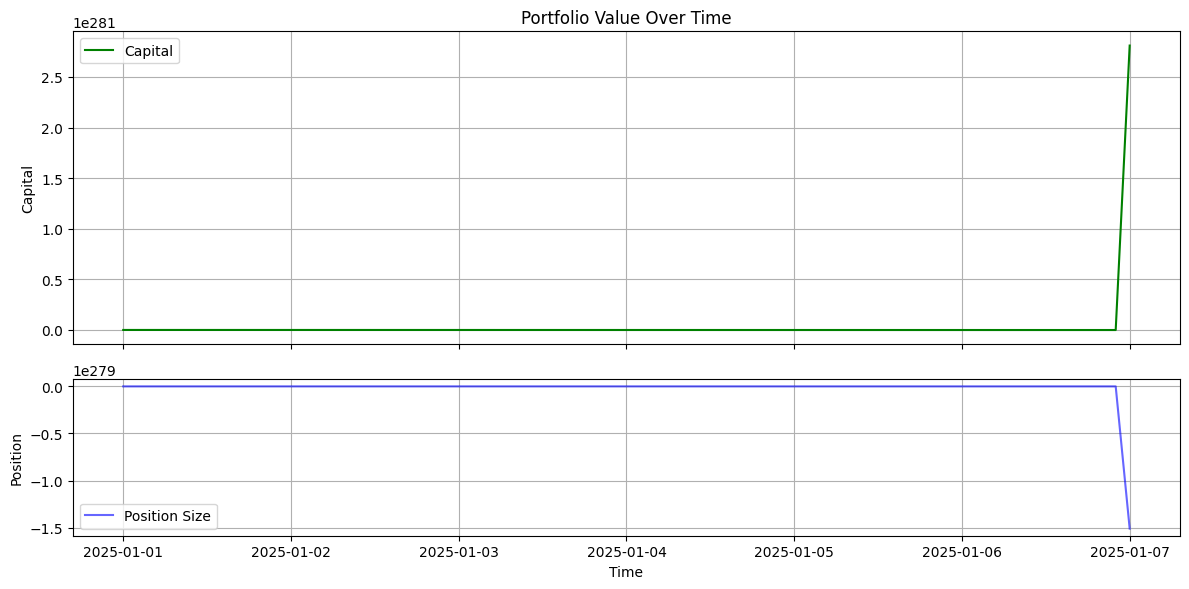

(              close_time base        bam_vwa    bam_open   bam_close  \
 8949 2025-01-01 00:00:00  BTC   93564.564464   93488.835   93576.005   
 71   2025-01-01 01:00:00  BTC   94004.151512   93576.000   94401.135   
 457  2025-01-01 02:00:00  BTC   93941.546455   94401.135   93607.735   
 843  2025-01-01 03:00:00  BTC   93842.067909   93607.735   94098.905   
 1229 2025-01-01 04:00:00  BTC   93884.658290   94098.905   93838.035   
 ...                  ...  ...            ...         ...         ...   
 7023 2025-01-06 19:00:00  BTC  101882.845942  101831.955  101738.805   
 7409 2025-01-06 20:00:00  BTC  101867.473516  101738.805  101817.225   
 7795 2025-01-06 21:00:00  BTC  102069.040611  101817.225  102129.755   
 8181 2025-01-06 22:00:00  BTC  102028.213007  102127.235  101611.925   
 8953 2025-01-07 00:00:00  BTC  102081.666935  102011.985  102235.605   
 
         bam_high     bam_low  bam_volatility_1m_return  base_volume  \
 8949   93755.995   93375.385                 94.2

In [264]:
simulate_trading(cur_df,model_linear1,list(selected_features))

In [252]:
selected_features

array(['bam_close_zscore5', 'bam_close_zscore10', 'close_vwa_spread',
       'cumret_3', 'mom_5', 'cumret_5', 'bam_close_zscore3',
       'bam_vwa_zscore5', 'mom_vwa_5', 'oc_return', 'bam_vwa_zscore10',
       'bam_vwa_zscore3', 'mom_10', 'cumret_10', 'mom_vwa_10', 'mom_20',
       'range_pct'], dtype=object)

# compare true return and predicted return

In [275]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr, pearsonr

def compare_returns(model, df, feature_cols,  start_time=None, end_time=None,target_col='return 1h',
                    plot=True):
    df = df.copy()

    # Filter by time if timestamps are available
    if start_time:
        df = df[df['close_time'] >= pd.to_datetime(start_time)]
    if end_time:
        df = df[df['close_time'] <= pd.to_datetime(end_time)]

    # Drop missing rows
    df = df.dropna(subset=feature_cols + [target_col])

    # Predict
    df['predicted_return'] = model.predict(df[feature_cols])
    df['true_return'] = df[target_col]

    # Metrics
    mse = mean_squared_error(df['true_return'], df['predicted_return'])
    pearson_corr, _ = pearsonr(df['true_return'], df['predicted_return'])
    spearman_corr, _ = spearmanr(df['true_return'], df['predicted_return'])

    metrics = {
        'MSE': mse,
        'Pearson Correlation': pearson_corr,
        'Spearman Correlation': spearman_corr
    }

    # Plotting
    if plot:
        plt.figure(figsize=(12, 5))

        # # Scatter: Predicted vs True
        # plt.subplot(1, 2, 1)
        
        # plt.scatter(df['true_return'], df['predicted_return'], alpha=0.5)
        # plt.xlabel('True Return')
        # plt.ylabel('Predicted Return')
        # plt.title('Predicted vs. True Return')
        # plt.grid(True)

        # # Residuals
        # plt.subplot(1, 2, 2)
        # residuals = df['true_return'] - df['predicted_return']
        # plt.hist(residuals, bins=50, color='red', alpha=0.6)
        # plt.title('Residuals (True - Predicted)')
        # plt.xlabel('Residual')
        # plt.grid(True)
        plt.plot(df['true_return'], c='r')
        plt.plot(df['predicted_return'], c='b')

        plt.tight_layout()
        plt.show()

    return df[['close_time', 'true_return', 'predicted_return']], metrics


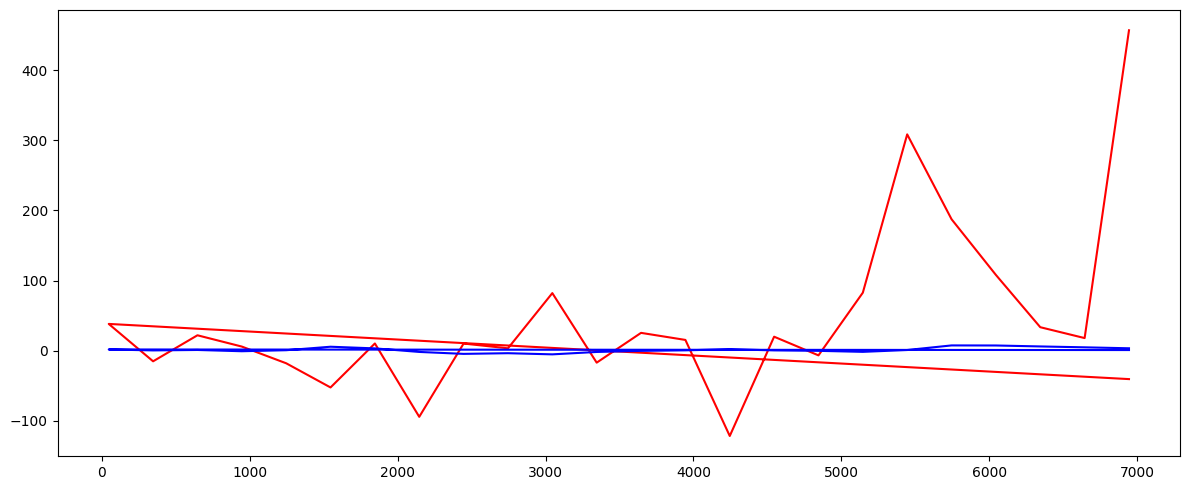

(              close_time  true_return  predicted_return
 6946 2023-02-01 00:00:00      -40.475          0.963125
 46   2023-02-01 01:00:00       38.225          1.790906
 346  2023-02-01 02:00:00      -15.090          0.449245
 646  2023-02-01 03:00:00       22.015          1.072979
 946  2023-02-01 04:00:00        5.920         -0.737285
 1246 2023-02-01 05:00:00      -17.890          0.717580
 1546 2023-02-01 06:00:00      -52.380          5.689300
 1846 2023-02-01 07:00:00       10.335          3.333558
 2146 2023-02-01 08:00:00      -94.260         -1.732955
 2446 2023-02-01 09:00:00       10.235         -4.494914
 2746 2023-02-01 10:00:00        3.430         -3.535557
 3046 2023-02-01 11:00:00       82.145         -5.184018
 3346 2023-02-01 12:00:00      -17.000         -1.758536
 3646 2023-02-01 13:00:00       25.465         -0.216340
 3946 2023-02-01 14:00:00       15.390          0.552929
 4246 2023-02-01 15:00:00     -121.595          2.130073
 4546 2023-02-01 16:00:00      

In [277]:
compare_returns(model_linear1, cur_df, list(selected_features), start_time='2023-02-01 00:00:00',end_time='2023-02-02 00:00:00')